## Chorobrewer

In [1]:

import libpysal 
import pandas as pd
import geopandas as gpd
import mapclassify


In [2]:

pth = libpysal.examples.get_path('south.shp')
gdf = gpd.read_file(pth)

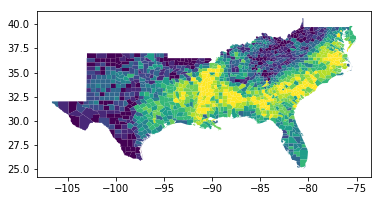

In [3]:
gdf.plot(column='BLK90', scheme='Quantiles', k=10)

In [4]:
q10 = mapclassify.Quantiles(gdf.BLK90,k=10)
q10

                Quantiles                
 
Lower            Upper              Count
         x[i] <=  0.280               142
 0.280 < x[i] <=  1.536               141
 1.536 < x[i] <=  3.311               141
 3.311 < x[i] <=  5.721               141
 5.721 < x[i] <= 10.008               141
10.008 < x[i] <= 15.512               141
15.512 < x[i] <= 22.888               141
22.888 < x[i] <= 31.565               141
31.565 < x[i] <= 42.376               141
42.376 < x[i] <= 86.236               142

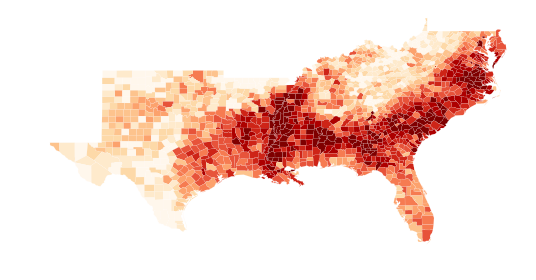

In [5]:
import matplotlib.pyplot as plt
f, ax = plt.subplots(1, figsize=(9, 9))
gdf.assign(cl=q10.yb).plot(column='cl', categorical=True, \
        k=10, cmap='OrRd', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=False)
ax.set_axis_off()
plt.show()

In [6]:
from mapclassify import color
import mapclassify
from ipywidgets import interact, Dropdown, RadioButtons, IntSlider, VBox, HBox, FloatSlider, Button, Label

k_classifiers = {
    'equal_interval': mapclassify.Equal_Interval,
    'fisher_jenks': mapclassify.Fisher_Jenks,
    'jenks_caspall': mapclassify.Jenks_Caspall,
    'jenks_caspall_forced': mapclassify.Jenks_Caspall_Forced,
    'max_p_classifier': mapclassify.Max_P_Classifier,
    'maximum_breaks': mapclassify.Maximum_Breaks,
    'natural_breaks': mapclassify.Natural_Breaks,
    'quantiles': mapclassify.Quantiles,
    }
def k_values(ctype, cmap):
    k = list(mapclassify.color.colorbrewer.COLOR_MAPS[ctype][cmap].keys())
    return list(map(int, k))
    
def update_map(method='quantiles', k=5, cmap='Blues'):
    classifier = k_classifiers[method](gdf.BLK90, k=k)
    f, ax = plt.subplots(1, figsize=(9, 9))
    gdf.assign(cl=classifier.yb).plot(column='cl', categorical=True, \
        k=k, cmap=cmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=False)
    ax.set_axis_off()
    plt.show()

data_type = RadioButtons(options=['Sequential', 'Diverging', 'Qualitative'])

bindings = {'Sequential': range(3,9+1),
            'Diverging': range(3,11+1),
            'Qualitative': range(3,12+1)}

cmap_bindings = {'Sequential': list(color.sequential.keys()),
                 'Diverging': list(color.diverging.keys()),
                 'Qualitative': list(color.qualitative.keys())}

class_val = Dropdown(options=bindings[data_type.value]) 
cmap_val = Dropdown(options=cmap_bindings[data_type.value])

def type_change(change):
    class_val.options = bindings[change['new']]
    cmap_val.options = cmap_bindings[change['new']]

def cmap_change(change):
    cmap=change['new']
    ctype = data_type.value
    k = k_values(ctype, cmap)
    class_val.options = k
    
data_type.observe(type_change, names=['value'])
cmap_val.observe(cmap_change, names=['value'])


from ipywidgets import Output, Tab
out = Output()
t = Tab()
t.children = [out]
#t

# In this case, the interact function must be defined after the conditions stated above... therefore, the k now depends on the radio button 

with out:
    interact(update_map, method=list(k_classifiers.keys()), cmap=cmap_val, k = class_val)

display(VBox([data_type, out]))

